<a href="https://colab.research.google.com/github/aashnadogra/VigilantEye/blob/main/VigilantEye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Aashna Dogra")

Aashna Dogra


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Cyber Security Breaches.csv'

df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Sr.No,Name_of_Covered_Entity,Individuals_Affected,Date_of_Breach,Type_of_Breach,year
0,1,Brooke Army Medical Center,1000,10/16/2009,Hacked,2009
1,2,"Mid America Kidney Stone Association, LLC",1000,9/22/2009,Hacked,2009
2,3,Alaska Department of Health and Social Services,501,10-12-2009,Hacked,2009
3,4,Health Services for Children with Special Need...,3800,10-09-2009,Loss,2009
4,5,"L. Douglas Carlson, M.D.",5257,9/27/2009,Hacked,2009


In [ ]:
import numpy as np

# Impact is defined when more than 100000 individuals affected
df['Impact'] = np.where(df['Individuals_Affected'] > 10000, 1, 0)

# 'Impact' column
print(df[['Individuals_Affected', 'Impact']])


      Individuals_Affected  Impact
0                     1000       0
1                     1000       0
2                      501       0
3                     3800       0
4                     5257       0
...                    ...     ...
1050                 28413       1
1051                  1831       0
1052                 33702       1
1053                  2289       0
1054                  5471       0

[1055 rows x 2 columns]


In [ ]:
# Checking for null values
df.isnull().sum()

Sr.No                     0
Name_of_Covered_Entity    0
Individuals_Affected      0
Date_of_Breach            0
Type_of_Breach            0
year                      0
Impact                    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sr.No                   1055 non-null   int64 
 1   Name_of_Covered_Entity  1055 non-null   object
 2   Individuals_Affected    1055 non-null   int64 
 3   Date_of_Breach          1055 non-null   object
 4   Type_of_Breach          1055 non-null   object
 5   year                    1055 non-null   int64 
 6   Impact                  1055 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 57.8+ KB
None
count    1.055000e+03
mean     3.026202e+04
std      2.278598e+05
min      5.000000e+02
25%      1.000000e+03
50%      2.300000e+03
75%      6.941000e+03
max      4.900000e+06
Name: Individuals_Affected, dtype: float64


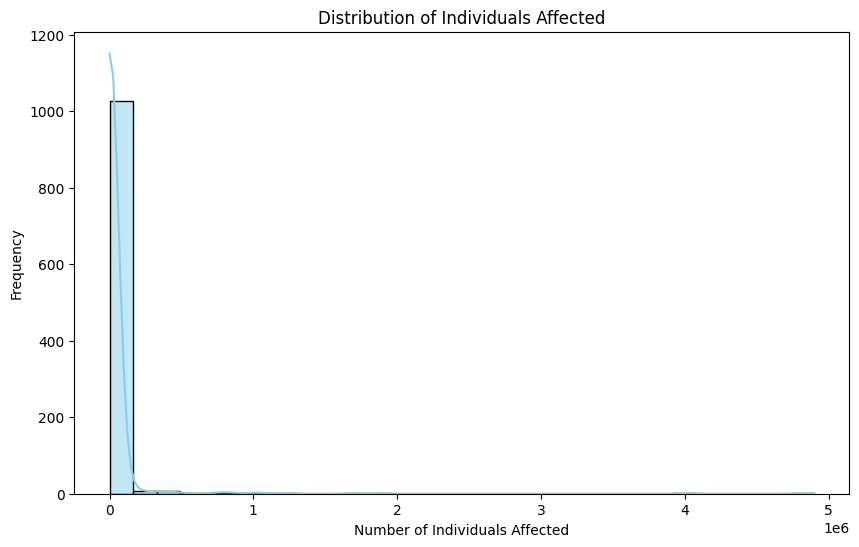

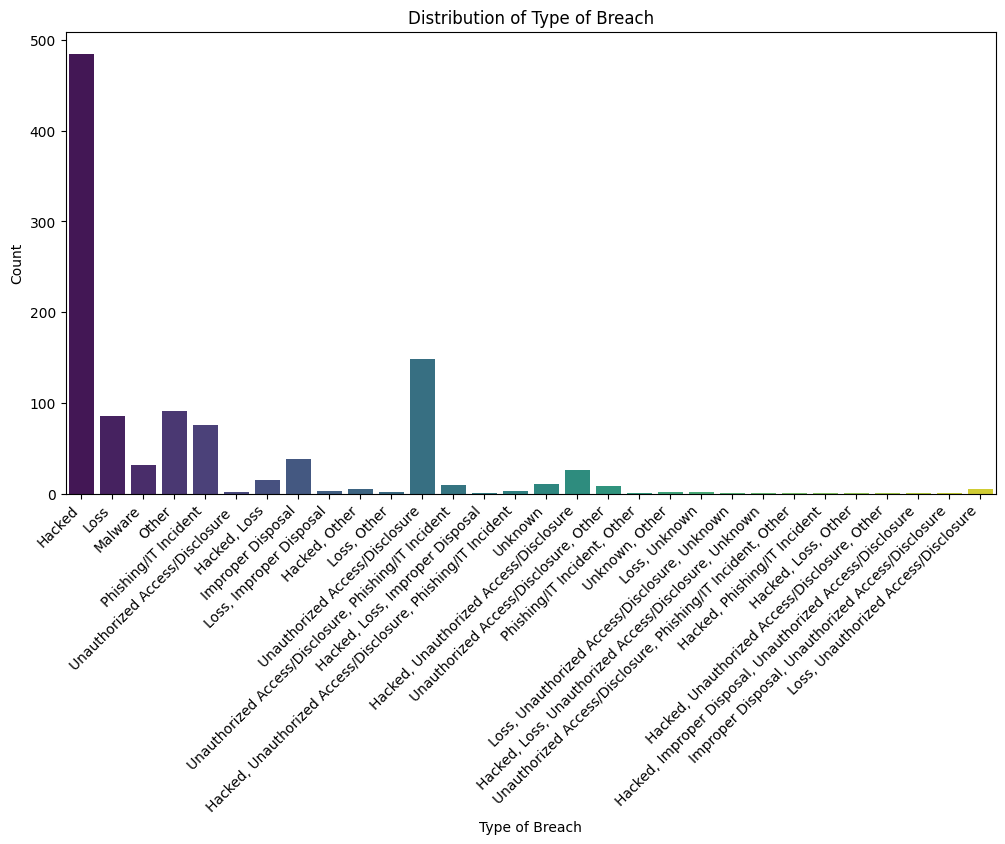

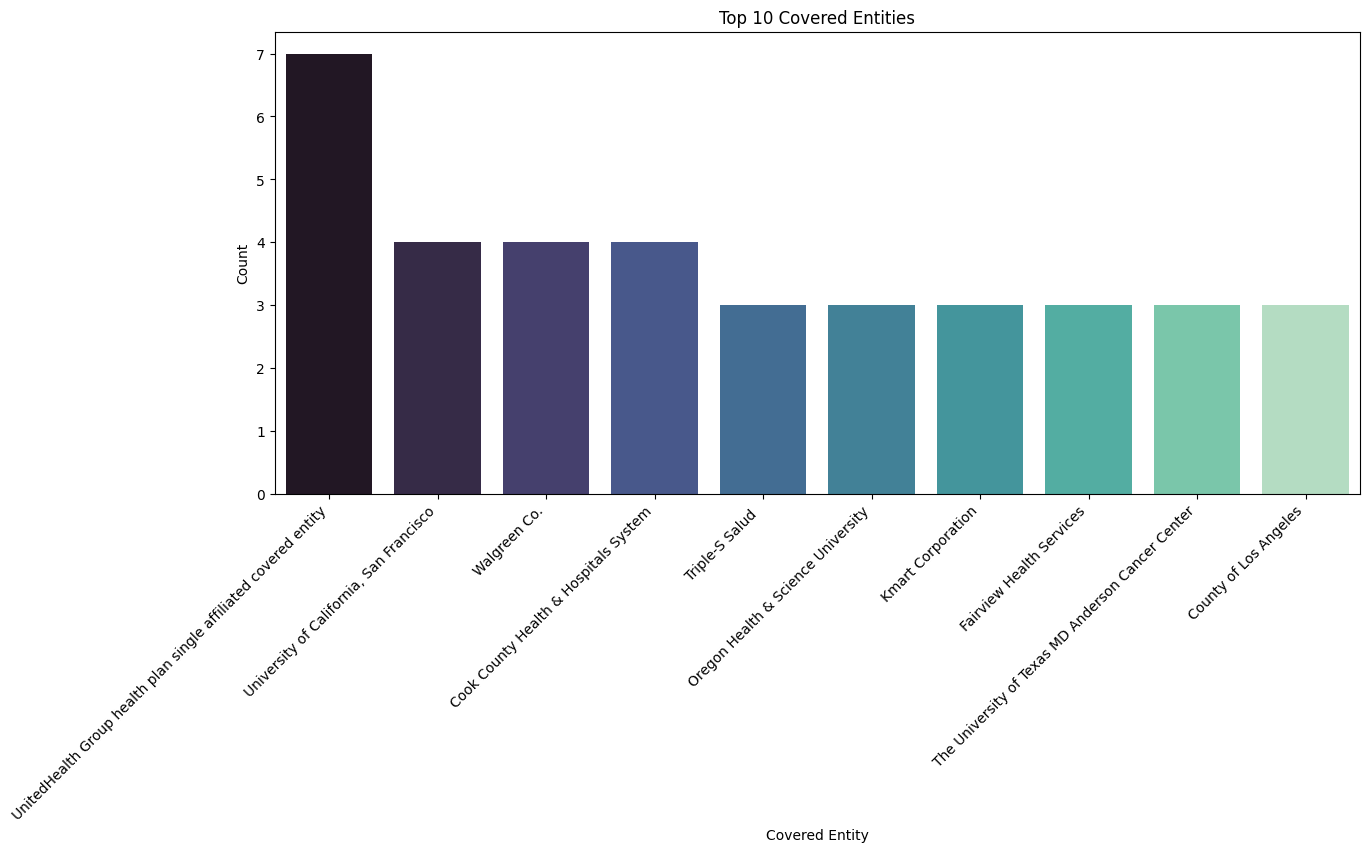

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Structure
print(df.info())

# Descriptive statistics for 'Individuals_Affected'
print(df['Individuals_Affected'].describe())

# Distribution of 'Individuals_Affected'
plt.figure(figsize=(10, 6))
sns.histplot(df['Individuals_Affected'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Individuals Affected')
plt.xlabel('Number of Individuals Affected')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Type_of_Breach'
plt.figure(figsize=(12, 6))
sns.countplot(x='Type_of_Breach', data=df, palette='viridis')
plt.title('Distribution of Type of Breach')
plt.xlabel('Type of Breach')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of 'Name_of_Covered_Entity' (Top 10)
top_entities = df['Name_of_Covered_Entity'].value_counts().nlargest(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_entities.index, y=top_entities.values, palette='mako')
plt.title('Top 10 Covered Entities')
plt.xlabel('Covered Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


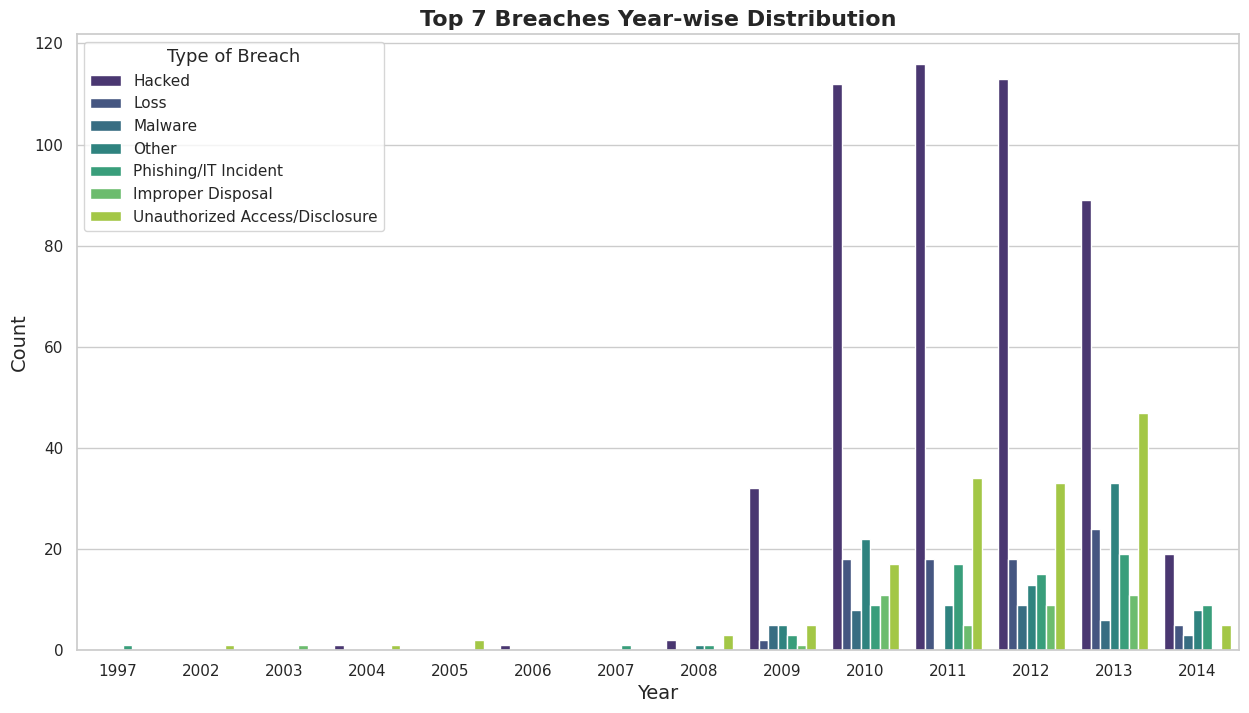

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Top 7 Type_of_Breach
top_7_breaches = df['Type_of_Breach'].value_counts().nlargest(7).index

# Filtering the dataframe
df_top_7 = df[df['Type_of_Breach'].isin(top_7_breaches)]

# Bar plot
plt.figure(figsize=(15, 8))
sns.countplot(x='year', hue='Type_of_Breach', data=df_top_7, palette='viridis')

plt.title('Top 7 Breaches Year-wise Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Type of Breach', title_fontsize='13')

# Show the plot
plt.show()

In [ ]:
# Converting 'Date_of_Breach' to datetime
df['Date_of_Breach'] = pd.to_datetime(df['Date_of_Breach'], errors='coerce')

# Extract the month and year
df['Month'] = df['Date_of_Breach'].dt.month
df['Year'] = df['Date_of_Breach'].dt.year

# Group by 'Year', 'Name_of_Covered_Entity', and 'Type_of_Breach'
grouped_data = df.groupby(['Year', 'Name_of_Covered_Entity', 'Type_of_Breach'])

# Descriptive statistics for 'Individuals_Affected'
stats_by_group = grouped_data['Individuals_Affected'].describe()
print(stats_by_group)


                                                                                                count  \
Year   Name_of_Covered_Entity                             Type_of_Breach                                
1997.0 UNCG Speech and Hearing Center                     Phishing/IT Incident                    1.0   
2002.0 UMass Memorial Medical Center                      Unauthorized Access/Disclosure          1.0   
2003.0 Riverside Mercy Hospital and Ohio/Mercy Diagnos... Improper Disposal                       1.0   
2004.0 SW General Inc                                     Hacked                                  1.0   
2008.0 Group Health Plan, Inc. Medical Benefit Plan       Loss, Unauthorized Access/Disclosure    1.0   
...                                                                                               ...   
2014.0 Todd M. Burton, M.D.                               Hacked                                  1.0   
       Tufts Associated Health Maintenance Organizatio.

In [ ]:
import pandas as pd

# Probability of each 'Type_of_Breach'
total_records = len(df)
type_of_breach_probabilities = df['Type_of_Breach'].value_counts() / total_records

print("Top 10 Probability of each Type_of_Breach:")
print(type_of_breach_probabilities.nlargest(10))
print()

# Conditional probability of each 'Type_of_Breach' given 'Name_of_Covered_Entity'
type_entity_cross_tab = pd.crosstab(df['Name_of_Covered_Entity'], df['Type_of_Breach'], margins=True, margins_name='Total')
type_entity_probabilities = type_entity_cross_tab.div(type_entity_cross_tab['Total'], axis=0)

# Display only the top 10 entities for each 'Type_of_Breach'
for breach_type in df['Type_of_Breach'].unique():
    top_entities = type_entity_probabilities[breach_type].nlargest(10)
    print(f"Top 10 Entities for {breach_type}:")
    print(top_entities)
    print()


Top 10 Probability of each Type_of_Breach:
Hacked                                    0.459716
Unauthorized Access/Disclosure            0.140284
Other                                     0.086256
Loss                                      0.080569
Phishing/IT Incident                      0.071090
Improper Disposal                         0.036019
Malware                                   0.029384
Hacked, Unauthorized Access/Disclosure    0.024645
Hacked, Loss                              0.014218
Unknown                                   0.009479
Name: Type_of_Breach, dtype: float64

Top 10 Entities for Hacked:
Name_of_Covered_Entity
 DeKalb Medical Center, Inc. d/b/a DeKalb Medical Hillandale    1.0
 Philip P Corneliuson, DDS, INC.                                1.0
101 FAMILY MEDICAL GROUP                                        1.0
ABQ HealthPartners                                              1.0
ACO of Puerto Rico                                              1.0
AHMC Healthcare In

In [ ]:
type_breach_probabilities = df['Type_of_Breach'].value_counts(normalize=True)
print("Overall Probability of Each Type of Breach:\n", type_breach_probabilities)


Overall Probability of Each Type of Breach:
 Hacked                                                          0.459716
Unauthorized Access/Disclosure                                  0.140284
Other                                                           0.086256
Loss                                                            0.080569
Phishing/IT Incident                                            0.071090
Improper Disposal                                               0.036019
Malware                                                         0.029384
Hacked, Unauthorized Access/Disclosure                          0.024645
Hacked, Loss                                                    0.014218
Unknown                                                         0.009479
Unauthorized Access/Disclosure, Phishing/IT Incident            0.008531
Unauthorized Access/Disclosure, Other                           0.007583
Loss, Unauthorized Access/Disclosure                            0.004739
Hacked

In [ ]:
# User input -> 'Name_of_Covered_Entity'
user_entity = input("Enter the Name_of_Covered_Entity: ")

# Conditional probability for the given entity
if user_entity in df['Name_of_Covered_Entity'].unique():
    entity_probabilities = type_entity_probabilities.loc[user_entity]
    print(f"Conditional Probability for {user_entity}:\n{entity_probabilities}")
else:
    print(f"{user_entity} not found in the dataset.")


Enter the Name_of_Covered_Entity: Walgreen Co.
Conditional Probability for Walgreen Co.:
Type_of_Breach
Hacked                                                          0.50
Hacked, Improper Disposal, Unauthorized Access/Disclosure       0.00
Hacked, Loss                                                    0.00
Hacked, Loss, Improper Disposal                                 0.00
Hacked, Loss, Other                                             0.00
Hacked, Loss, Unauthorized Access/Disclosure, Unknown           0.00
Hacked, Other                                                   0.00
Hacked, Phishing/IT Incident                                    0.00
Hacked, Unauthorized Access/Disclosure                          0.00
Hacked, Unauthorized Access/Disclosure, Other                   0.00
Hacked, Unauthorized Access/Disclosure, Phishing/IT Incident    0.00
Improper Disposal                                               0.00
Improper Disposal, Unauthorized Access/Disclosure               0.00

Enter the Type_of_Breach: Malware
Top 10 Entities for Malware (Total Individuals Affected):
Name_of_Covered_Entity
Lee D. Pollan, DMD, PC                            19178
Montefiore Medical Center                         16820
Grays Harbor Pediatrics, PLLC                     12009
Robert Witham, MD, FACP                           11136
United Dynacare, LLC dba Dynacare Laboratories     9328
Cook County Health & Hospitals System              7081
Michele Del Vicario, MD                            6145
City of Hope National Medical Center               5900
Mark A. Gillispie                                  5845
Mark D. Lurie, MD                                  5166
Name: Individuals_Affected, dtype: int64


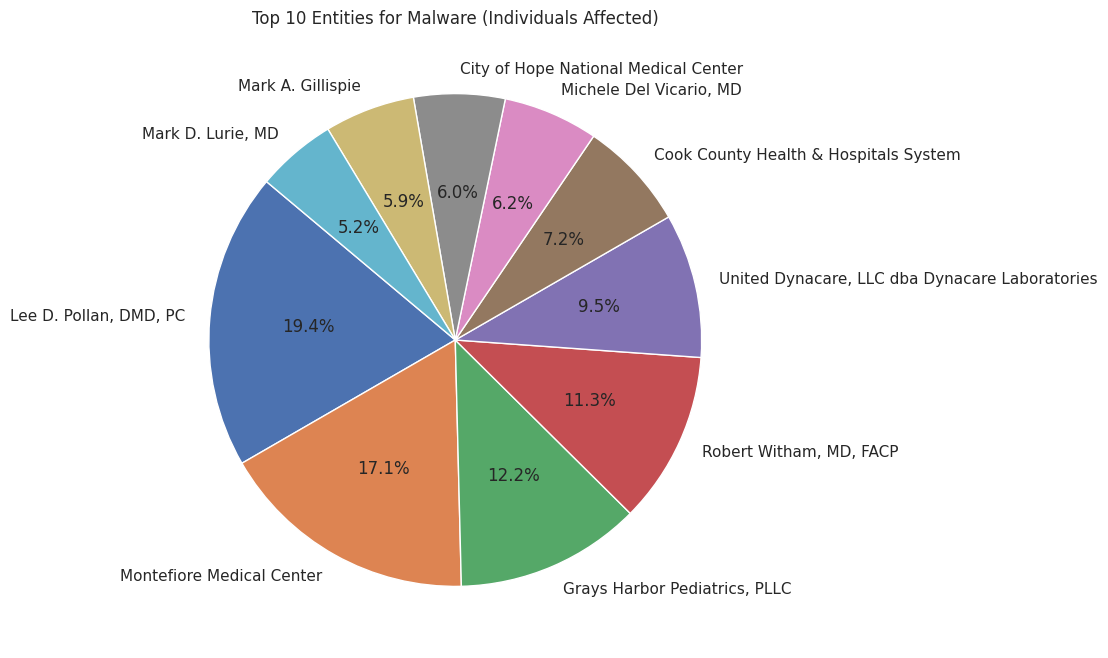

In [ ]:
import matplotlib.pyplot as plt

# User input -> 'Type_of_Breach'
user_breach_type = input("Enter the Type_of_Breach: ")

if user_breach_type in df['Type_of_Breach'].unique():
    filtered_df = df[df['Type_of_Breach'] == user_breach_type]

    # Top 10 entities with the highest total individuals affected
    top_entities = filtered_df.groupby('Name_of_Covered_Entity')['Individuals_Affected'].sum().nlargest(10)
    print(f"Top 10 Entities for {user_breach_type} (Total Individuals Affected):\n{top_entities}")

    # Pie chart for total individuals affected
    plt.figure(figsize=(8, 8))
    plt.pie(top_entities,
            labels=top_entities.index,
            autopct='%1.1f%%',
            startangle=140)
    plt.title(f"Top 10 Entities for {user_breach_type} (Individuals Affected)")
    plt.show()

else:
    print(f"{user_breach_type} not found in the dataset.")


Enter the Type_of_Breach: Hacked
Top 10 Entities for Hacked:
Name_of_Covered_Entity
 DeKalb Medical Center, Inc. d/b/a DeKalb Medical Hillandale    1.0
 Philip P Corneliuson, DDS, INC.                                1.0
101 FAMILY MEDICAL GROUP                                        1.0
ABQ HealthPartners                                              1.0
ACO of Puerto Rico                                              1.0
AHMC Healthcare Inc. and affiliated Hospitals                   1.0
Abrham Tekola, M.D.,INC                                         1.0
Access Counseling, LLC                                          1.0
Access Medical Group -IPA 344                                   1.0
Administracion de Seguros de Salud                              1.0
Name: Hacked, dtype: float64


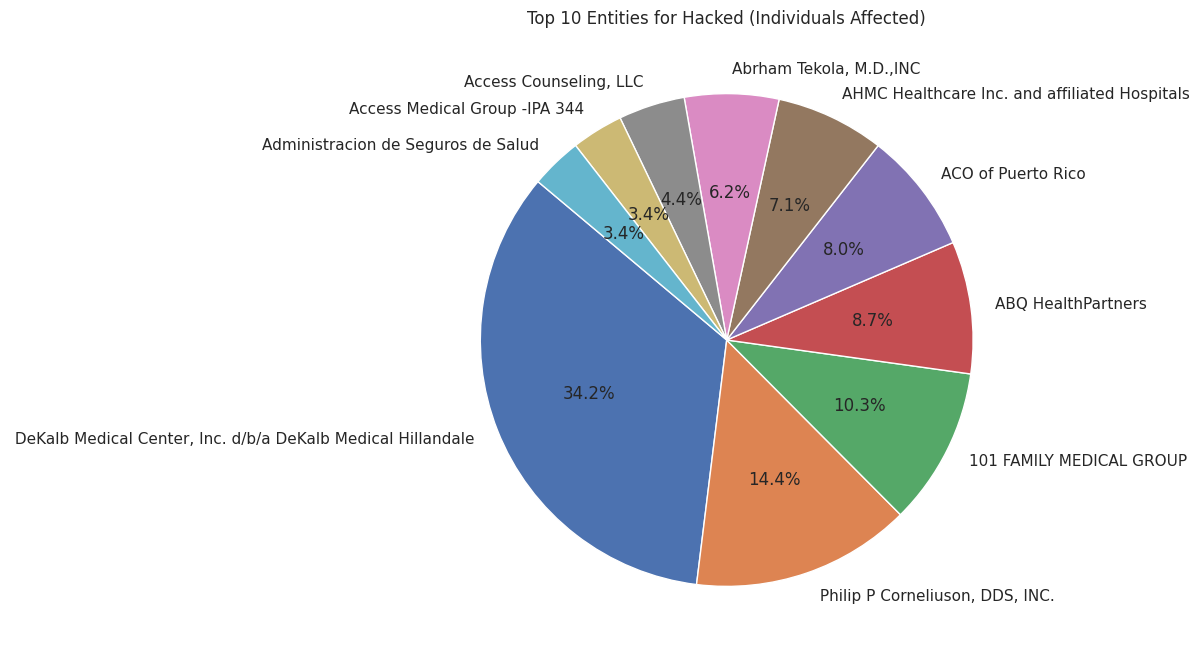

In [ ]:
import matplotlib.pyplot as plt

# User input -> 'Type_of_Breach'
user_breach_type = input("Enter the Type_of_Breach: ")

# Conditional probability for the given breach type
if user_breach_type in df['Type_of_Breach'].unique():
    breach_type_probabilities = type_entity_probabilities[user_breach_type]

    # Top 10 entities with the highest probability
    top_entities = breach_type_probabilities.nlargest(10)
    print(f"Top 10 Entities for {user_breach_type}:\n{top_entities}")

    # Pie chart for total individuals affected
    plt.figure(figsize=(8, 8))
    plt.pie(df[df['Type_of_Breach'] == user_breach_type].groupby('Name_of_Covered_Entity')['Individuals_Affected'].sum().nlargest(10),
            labels=top_entities.index,
            autopct='%1.1f%%',
            startangle=140)
    plt.title(f"Top 10 Entities for {user_breach_type} (Individuals Affected)")
    plt.show()

else:
    print(f"{user_breach_type} not found in the dataset.")


<ipython-input-50-983e1ef6b346>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=3, square=True)


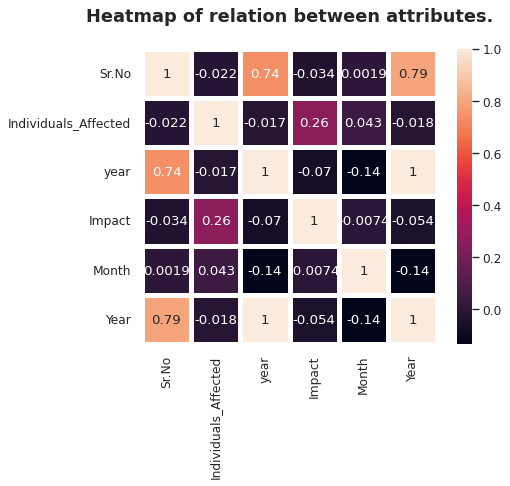

In [ ]:
# Heatmap to identify the relation between attributes
plt.figure(dpi=80)
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=3, square=True)
plt.title('Heatmap of relation between attributes.\n',fontsize=16,fontweight='bold');

count    1.055000e+03
mean     3.026202e+04
std      2.278598e+05
min      5.000000e+02
25%      1.000000e+03
50%      2.300000e+03
75%      6.941000e+03
max      4.900000e+06
Name: Individuals_Affected, dtype: float64



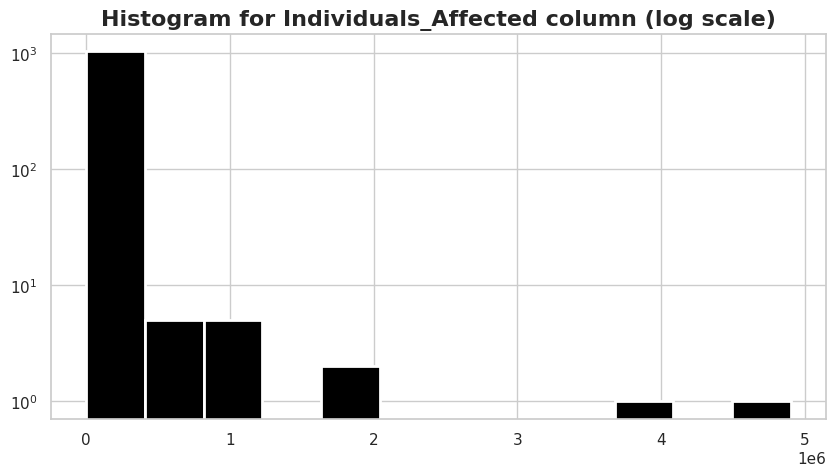

In [ ]:
import matplotlib.pyplot as plt

# Descriptive statistics for the 'Individuals_Affected' column.
print(df['Individuals_Affected'].describe())
print()

# Histogram with a logarithmic scale.
plt.figure(figsize=(10, 5))
plt.hist(df['Individuals_Affected'], bins='sturges', color='black', linewidth=2, edgecolor='white', log=True)
plt.title('Histogram for Individuals_Affected column (log scale)', fontsize=16, fontweight='bold')
plt.show()


In [ ]:
import pandas as pd

# Basic statistics for numerical columns
numerical_stats = df.describe()

user_breach_type = input('Enter the Type of Breach for which you want to check stats: ')

# Probability of a breach being 'Hacked'
probability_hacked = df[df['Type_of_Breach'] == user_breach_type].shape[0] / df.shape[0]

# Calculate the mean and standard deviation of 'Individuals_Affected'
mean_individuals_affected = df['Individuals_Affected'].mean()
std_dev_individuals_affected = df['Individuals_Affected'].std()

# Print the results
print("Numerical Statistics:")
print(numerical_stats)
print("\nProbability of Type", user_breach_type, "Breach:", probability_hacked)
print("\nMean Individuals Affected:", mean_individuals_affected)
print("Standard Deviation of Individuals Affected:", std_dev_individuals_affected)


Enter the Type of Breach for which you want to check stats: Malware
Numerical Statistics:
            Sr.No  Individuals_Affected         year       Impact      Month  \
count  1055.00000          1.055000e+03  1055.000000  1055.000000  909.00000   
mean    528.00000          3.026202e+04  2011.450237     0.175355    6.40484   
std     304.69657          2.278598e+05     1.581780     0.380451    3.53725   
min       1.00000          5.000000e+02  1997.000000     0.000000    1.00000   
25%     264.50000          1.000000e+03  2010.000000     0.000000    3.00000   
50%     528.00000          2.300000e+03  2012.000000     0.000000    6.00000   
75%     791.50000          6.941000e+03  2013.000000     0.000000    9.00000   
max    1055.00000          4.900000e+06  2014.000000     1.000000   12.00000   

              Year  
count   909.000000  
mean   2011.414741  
std       1.577877  
min    1997.000000  
25%    2010.000000  
50%    2011.000000  
75%    2013.000000  
max    2014.000000  


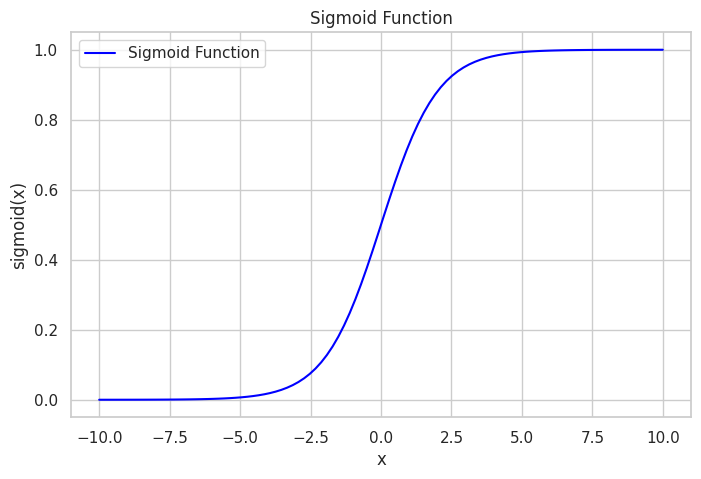

In [ ]:
import pandas as pd
import numpy as np

# sigmoid() function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = pd.Series(np.linspace(-10, 10, 100))
y_values = sigmoid(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
column_name = 'Individuals_Affected'

# Calculate mean and standard deviation
mean_value = df[column_name].mean()
std_dev = df[column_name].std()

# z-score normalization formula
df['Normalized_Individuals_Affected'] = (df[column_name] - mean_value) / std_dev


In [ ]:
df['Sigmoid_Output'] = sigmoid(df['Normalized_Individuals_Affected'])

def predict(sigmoid_output, threshold):
    pred = [1 if output >= threshold else 0 for output in sigmoid_output]
    return pd.Series(pred)

In [ ]:
threshold_value = 0.49

# Predict
df['Predicted'] = predict(df['Sigmoid_Output'], threshold_value)

# DataFrame with the new columns
print(df[['Individuals_Affected', 'Normalized_Individuals_Affected', 'Sigmoid_Output', 'Predicted']])


      Individuals_Affected  Normalized_Individuals_Affected  Sigmoid_Output  \
0                     1000                        -0.128421        0.467939   
1                     1000                        -0.128421        0.467939   
2                      501                        -0.130611        0.467394   
3                     3800                        -0.116133        0.470999   
4                     5257                        -0.109739        0.472593   
...                    ...                              ...             ...   
1050                 28413                        -0.008115        0.497971   
1051                  1831                        -0.124774        0.468847   
1052                 33702                         0.015097        0.503774   
1053                  2289                        -0.122764        0.469347   
1054                  5471                        -0.108799        0.472827   

      Predicted  
0             0  
1             0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(df['Impact'], df['Predicted'])

print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(df['Impact'], df['Predicted'])
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[870   0]
 [ 84 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       870
           1       1.00      0.55      0.71       185

    accuracy                           0.92      1055
   macro avg       0.96      0.77      0.83      1055
weighted avg       0.93      0.92      0.91      1055



Accuracy for different thresholds:
Threshold: 0.1, Accuracy: 0.17535545023696683
Threshold: 0.3, Accuracy: 0.17535545023696683
Threshold: 0.5, Accuracy: 0.8966824644549763
Threshold: 0.7, Accuracy: 0.8464454976303317
Threshold: 0.9, Accuracy: 0.8360189573459715


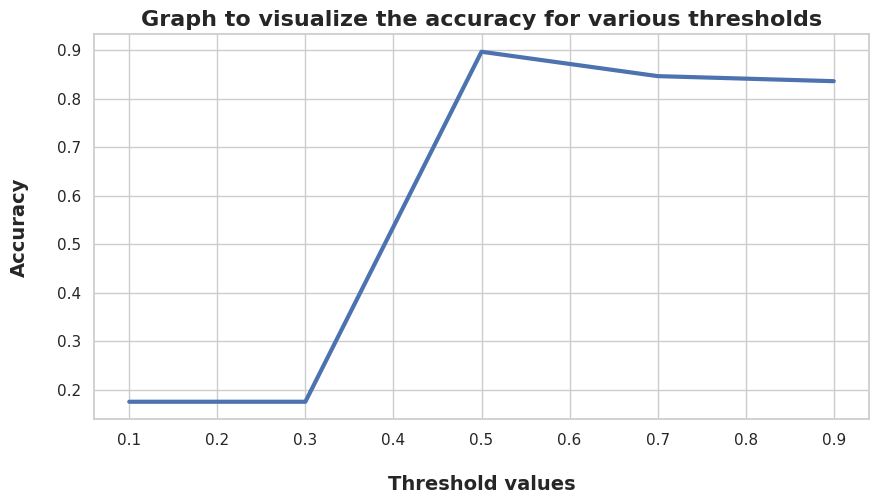

In [ ]:
# Calculate accuracy
def calculate_accuracy(y_actual, y_predicted):
    count = 0
    for i in range(len(y_actual)):
        if y_actual[i] == y_predicted[i]:
            count += 1
    accuracy = count / len(y_actual)
    return accuracy

thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
accuracy_list = []

for i in thresholds:
    pred_2 = predict(df['Sigmoid_Output'], i)
    accuracy = calculate_accuracy(df['Impact'], pred_2)
    accuracy_list.append(accuracy)

print("Accuracy for different thresholds:")
for t, acc in zip(thresholds, accuracy_list):
    print(f"Threshold: {t}, Accuracy: {acc}")

# Visualize the accuracy for various thresholds
plt.figure(figsize=(10, 5))
plt.title('Graph to visualize the accuracy for various thresholds', fontsize=16, fontweight='bold')
plt.plot(thresholds, accuracy_list, linewidth=3)
plt.xlabel('\nThreshold values', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy\n', fontsize=14, fontweight='bold')
plt.show()
